<a href="https://colab.research.google.com/github/rodraxphysics/Master_VIU_Data_Science/blob/main/08_Evaluacion_Resultados_Modelo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>  <center>
## <center> Universidad Internacional de Valencia (VIU) <center>
## <center> Trabajo Fin de Master (TFM) <center>


---


# <center> **Predicción de la magnitud de la banda prohibida (bandgap) en compuestos inorgánicos mediante técnicas de Machine Learning** <center>


---



**Titulación:** Máster en Big Data y Data Science

**Alumno:** Rodrigo Eduardo Sandoval Brito

**Director:** Jose Carlos González, PhD.



---


## <center> **Evaluacion de resultados de Modelo Final** <center>

Comenzamos importando los 3 datasets proporcionados por DataDriven

In [ ]:
# Imports generales
import pandas as pd
import io
from google.colab import files
import numpy as np
import time

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)

  return df

df = upload_files()

**Obtenemos una copia del dataset final ya que dataset utilizado por el algoritmo de regresion es distinto al dataset utilizado por el algoritmo de clasificacion, con la diferencia en que el bandgap es numerico en regresion y booleano en clasificacion**

In [ ]:
df1=df.copy()

**Transformamos variable numerica del bandgap a booleana para aplicar los algoritmos de clasificacion**

In [ ]:
df['band_gap'] = df['band_gap'].apply(lambda x: 1 if x != 0 else 0)

**Normalizacion de las caracteristicas y division de datos training y test en ratio 80/20**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

selected_features = ['nsites', 'nelements', 'volume', 'density', 'density_atomic', 'crystal_symmetry', 'symmetry_number', 'sides_abc', 'angles_abc', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'efermi', 'is_magnetic', 'total_magnetization', 'num_magnetic_sites', 'molecular_weight', 'Ho_count', 'Ho_mass_ratio', 'Ti_count', 'Ti_mass_ratio', 'Lu_count', 'Lu_mass_ratio', 'Hf_count', 'Hf_mass_ratio', 'Cu_count', 'Cu_mass_ratio', 'Ga_count', 'Ga_mass_ratio', 'Ba_count', 'Ba_mass_ratio', 'Te_count', 'Te_mass_ratio', 'Au_count', 'Au_mass_ratio', 'Ce_count', 'Ce_mass_ratio', 'Pa_count', 'Pa_mass_ratio', 'Br_count', 'Br_mass_ratio', 'Gd_count', 'Gd_mass_ratio', 'Nb_count', 'Nb_mass_ratio', 'Dy_count', 'Dy_mass_ratio', 'Os_count', 'Os_mass_ratio', 'Nd_count', 'Nd_mass_ratio', 'Co_count', 'Co_mass_ratio', 'Zn_count', 'Zn_mass_ratio', 'Ni_count', 'Ni_mass_ratio', 'V_count', 'V_mass_ratio', 'Cd_count', 'Cd_mass_ratio', 'Hg_count', 'Hg_mass_ratio', 'La_count', 'La_mass_ratio', 'Cs_count', 'Cs_mass_ratio', 'B_count', 'B_mass_ratio', 'Ag_count', 'Ag_mass_ratio', 'Ru_count', 'Ru_mass_ratio', 'Ar_count', 'Ar_mass_ratio', 'Tb_count', 'Tb_mass_ratio', 'Y_count', 'Y_mass_ratio', 'Sn_count', 'Sn_mass_ratio', 'Fe_count', 'Fe_mass_ratio', 'Yb_count', 'Yb_mass_ratio', 'P_count', 'P_mass_ratio', 'Sb_count', 'Sb_mass_ratio', 'Er_count', 'Er_mass_ratio', 'Ir_count', 'Ir_mass_ratio', 'Th_count', 'Th_mass_ratio', 'Si_count', 'Si_mass_ratio', 'O_count', 'O_mass_ratio', 'F_count', 'F_mass_ratio', 'Na_count', 'Na_mass_ratio', 'Pr_count', 'Pr_mass_ratio', 'N_count', 'N_mass_ratio', 'Mo_count', 'Mo_mass_ratio', 'Se_count', 'Se_mass_ratio', 'Kr_count', 'Kr_mass_ratio', 'Tl_count', 'Tl_mass_ratio', 'Mg_count', 'Mg_mass_ratio', 'Rb_count', 'Rb_mass_ratio', 'Ne_count', 'Ne_mass_ratio', 'Li_count', 'Li_mass_ratio', 'W_count', 'W_mass_ratio', 'Eu_count', 'Eu_mass_ratio', 'Al_count', 'Al_mass_ratio', 'Pm_count', 'Pm_mass_ratio', 'Sr_count', 'Sr_mass_ratio', 'Rh_count', 'Rh_mass_ratio', 'As_count', 'As_mass_ratio', 'Pt_count', 'Pt_mass_ratio', 'Cr_count', 'Cr_mass_ratio', 'Pd_count', 'Pd_mass_ratio', 'Tc_count', 'Tc_mass_ratio', 'I_count', 'I_mass_ratio', 'Sm_count', 'Sm_mass_ratio', 'Re_count', 'Re_mass_ratio', 'Ge_count', 'Ge_mass_ratio', 'Cl_count', 'Cl_mass_ratio', 'S_count', 'S_mass_ratio', 'U_count', 'U_mass_ratio', 'H_count', 'H_mass_ratio', 'Tm_count', 'Tm_mass_ratio', 'In_count', 'In_mass_ratio', 'K_count', 'K_mass_ratio', 'Bi_count', 'Bi_mass_ratio', 'Mn_count', 'Mn_mass_ratio', 'Ca_count', 'Ca_mass_ratio', 'Sc_count', 'Sc_mass_ratio', 'Pu_count', 'Pu_mass_ratio', 'Ac_count', 'Ac_mass_ratio', 'Be_count', 'Be_mass_ratio', 'Xe_count', 'Xe_mass_ratio', 'C_count', 'C_mass_ratio', 'He_count', 'He_mass_ratio', 'Zr_count', 'Zr_mass_ratio', 'Np_count', 'Np_mass_ratio', 'Ta_count', 'Ta_mass_ratio', 'Pb_count', 'Pb_mass_ratio']

X=df[selected_features]
y=df["band_gap"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(5845, 197)
(23377, 197)
(23377,)
(5845,)


**Aplicamos el algoritmo de Clasificacion RFC con hiperparametros ya optimizados**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

# Inicializar el clasificador de Random Forest
best_params={'n_estimators': 681, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 37, 'bootstrap': False}
rf = RandomForestClassifier(**best_params,random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Precisión del modelo en el conjunto de prueba:", accuracy)

# Mostrar la matriz de confusión
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Mostrar el informe de clasificación
print("Informe de clasificación:\n", classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc)

Precisión del modelo en el conjunto de prueba: 0.9271171941830625
Matriz de confusión:
 [[3056  236]
 [ 190 2363]]
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      3292
           1       0.91      0.93      0.92      2553

    accuracy                           0.93      5845
   macro avg       0.93      0.93      0.93      5845
weighted avg       0.93      0.93      0.93      5845



**Separamos los valores de bandgap de cero para evaluarlos con RFC y los valores distintos de cero para evaluarlos con GBR**

In [ ]:
# Predecir con el clasificador
y_pred_class = rf.predict(X_test)

# Dividir X_test en dos partes
X_test_zero = X_test[y_pred_class == 0]
X_test_nonzero = X_test[y_pred_class != 0]

# Para los valores cero, ya sabemos que el valor predicho es cero, entonces:
y_pred_zero = np.zeros(X_test_zero.shape[0])

**Aplicamos el algoritmo de Regresion GBR con hiperparametros ya optimizados**

In [ ]:
df=df1.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

selected_features = ['nsites', 'nelements', 'volume', 'density', 'density_atomic', 'crystal_symmetry', 'symmetry_number', 'sides_abc', 'angles_abc', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'efermi', 'is_magnetic', 'total_magnetization', 'num_magnetic_sites', 'molecular_weight', 'Ho_count', 'Ho_mass_ratio', 'Ti_count', 'Ti_mass_ratio', 'Lu_count', 'Lu_mass_ratio', 'Hf_count', 'Hf_mass_ratio', 'Cu_count', 'Cu_mass_ratio', 'Ga_count', 'Ga_mass_ratio', 'Ba_count', 'Ba_mass_ratio', 'Te_count', 'Te_mass_ratio', 'Au_count', 'Au_mass_ratio', 'Ce_count', 'Ce_mass_ratio', 'Pa_count', 'Pa_mass_ratio', 'Br_count', 'Br_mass_ratio', 'Gd_count', 'Gd_mass_ratio', 'Nb_count', 'Nb_mass_ratio', 'Dy_count', 'Dy_mass_ratio', 'Os_count', 'Os_mass_ratio', 'Nd_count', 'Nd_mass_ratio', 'Co_count', 'Co_mass_ratio', 'Zn_count', 'Zn_mass_ratio', 'Ni_count', 'Ni_mass_ratio', 'V_count', 'V_mass_ratio', 'Cd_count', 'Cd_mass_ratio', 'Hg_count', 'Hg_mass_ratio', 'La_count', 'La_mass_ratio', 'Cs_count', 'Cs_mass_ratio', 'B_count', 'B_mass_ratio', 'Ag_count', 'Ag_mass_ratio', 'Ru_count', 'Ru_mass_ratio', 'Ar_count', 'Ar_mass_ratio', 'Tb_count', 'Tb_mass_ratio', 'Y_count', 'Y_mass_ratio', 'Sn_count', 'Sn_mass_ratio', 'Fe_count', 'Fe_mass_ratio', 'Yb_count', 'Yb_mass_ratio', 'P_count', 'P_mass_ratio', 'Sb_count', 'Sb_mass_ratio', 'Er_count', 'Er_mass_ratio', 'Ir_count', 'Ir_mass_ratio', 'Th_count', 'Th_mass_ratio', 'Si_count', 'Si_mass_ratio', 'O_count', 'O_mass_ratio', 'F_count', 'F_mass_ratio', 'Na_count', 'Na_mass_ratio', 'Pr_count', 'Pr_mass_ratio', 'N_count', 'N_mass_ratio', 'Mo_count', 'Mo_mass_ratio', 'Se_count', 'Se_mass_ratio', 'Kr_count', 'Kr_mass_ratio', 'Tl_count', 'Tl_mass_ratio', 'Mg_count', 'Mg_mass_ratio', 'Rb_count', 'Rb_mass_ratio', 'Ne_count', 'Ne_mass_ratio', 'Li_count', 'Li_mass_ratio', 'W_count', 'W_mass_ratio', 'Eu_count', 'Eu_mass_ratio', 'Al_count', 'Al_mass_ratio', 'Pm_count', 'Pm_mass_ratio', 'Sr_count', 'Sr_mass_ratio', 'Rh_count', 'Rh_mass_ratio', 'As_count', 'As_mass_ratio', 'Pt_count', 'Pt_mass_ratio', 'Cr_count', 'Cr_mass_ratio', 'Pd_count', 'Pd_mass_ratio', 'Tc_count', 'Tc_mass_ratio', 'I_count', 'I_mass_ratio', 'Sm_count', 'Sm_mass_ratio', 'Re_count', 'Re_mass_ratio', 'Ge_count', 'Ge_mass_ratio', 'Cl_count', 'Cl_mass_ratio', 'S_count', 'S_mass_ratio', 'U_count', 'U_mass_ratio', 'H_count', 'H_mass_ratio', 'Tm_count', 'Tm_mass_ratio', 'In_count', 'In_mass_ratio', 'K_count', 'K_mass_ratio', 'Bi_count', 'Bi_mass_ratio', 'Mn_count', 'Mn_mass_ratio', 'Ca_count', 'Ca_mass_ratio', 'Sc_count', 'Sc_mass_ratio', 'Pu_count', 'Pu_mass_ratio', 'Ac_count', 'Ac_mass_ratio', 'Be_count', 'Be_mass_ratio', 'Xe_count', 'Xe_mass_ratio', 'C_count', 'C_mass_ratio', 'He_count', 'He_mass_ratio', 'Zr_count', 'Zr_mass_ratio', 'Np_count', 'Np_mass_ratio', 'Ta_count', 'Ta_mass_ratio', 'Pb_count', 'Pb_mass_ratio']

X=df[selected_features]
y=df["band_gap"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(5845, 197)
(23377, 197)
(23377,)
(5845,)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np

# Modelos con hiperparámetros específicos
gb_parameters ={'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 620, 'subsample': 0.99}
gb_model = GradientBoostingRegressor(**gb_parameters, random_state=42)

# Entrenamiento
gb_model.fit(X_train, y_train)

# Predicciones individuales
y_pred_gb = gb_model.predict(X_test)

# Evaluación individual
r2_gb = r2_score(y_test, y_pred_gb)

# Evaluación del ensemble
mae_gb= mean_absolute_error(y_test, y_pred_gb)

# Mostrar las métricas
print("R² Gradient Boosting:", r2_gb)
print("MAE Gradient Boosting:", mae_gb)


R² Gradient Boosting: 0.8892974667211315
MAE Gradient Boosting: 0.30202681798443304


**Combinamos las predicciones de ambos modelos, cuando bandgap es igual a cero utilizamos RFC y cuando es distinto de cero usamos GBR**

In [ ]:
#Predecir los valores no cero con el modelo de regresión
y_pred_nonzero = gb_model.predict(X_test_nonzero)

# Primero, crea un array vacío para almacenar las predicciones finales
y_pred_final = np.empty(X_test.shape[0])

# Rellena el array con las predicciones de cero
y_pred_final[y_pred_class == 0] = y_pred_zero

# Rellena el resto con las predicciones de no cero
y_pred_final[y_pred_class != 0] = y_pred_nonzero

**Evaluamos las predicciones en dataset de test y observamos que modelo final presenta coeficiente de determinacion de 0.89 y MAE de 0.25**

In [ ]:
from sklearn.metrics import mean_squared_error

r2_ensemble = r2_score(y_test, y_pred_final)
mae_ensamble= mean_absolute_error(y_test, y_pred_final)
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_final))

# Mostrar las métricas
print("R² Ensemble (Random Forest + Gradient Boosting):", r2_ensemble)
print("MAE Ensemble (Random Forest + Gradient Boosting):", mae_ensamble)
print("RMSE Ensemble (Random Forest + Gradient Boosting):", rmse_ensemble)

R² Ensemble (Random Forest + Gradient Boosting): 0.8913345029112099
MAE Ensemble (Random Forest + Gradient Boosting): 0.25904640278456564
RMSE Ensemble (Random Forest + Gradient Boosting): 0.5278919244707677


**R² de modelo final**: 0.8913345029112099

**MAE de modelo final:**  0.25904640278456564

**Evaluamos las predicciones del modelo final**

In [ ]:
import pandas as pd
formatted_predictions = [max(round(prediction, 4), 0) for prediction in y_pred_final]

df_visualization = pd.DataFrame({
    'y_real': y_test[100:130].values,
    'y_pred': formatted_predictions[100:130]
})

print(df_visualization)

    y_real  y_pred
0   8.0448  7.4473
1   0.0000  0.0000
2   0.0000  0.0000
3   4.2353  3.6754
4   0.0000  0.2133
5   2.9492  1.8457
6   0.0000  0.0000
7   0.0000  0.0000
8   2.8210  1.9941
9   3.8866  3.0316
10  1.5858  0.9219
11  0.1950  0.4538
12  0.0000  0.0000
13  3.3844  2.4757
14  0.0000  0.0000
15  2.3958  1.6782
16  1.1346  0.7680
17  5.3288  4.1602
18  0.0000  0.0000
19  0.0000  0.0000
20  0.0000  0.0000
21  0.0000  0.0000
22  0.0000  0.0000
23  0.0000  0.0000
24  3.2641  3.0055
25  0.0000  0.0000
26  1.6437  0.8718
27  4.0182  3.7860
28  3.3909  2.7840
29  0.0000  0.0000


**Generamos grafico de comparacion de valores reales y predichos por modelo final para 30 predicciones del dataset de testing**

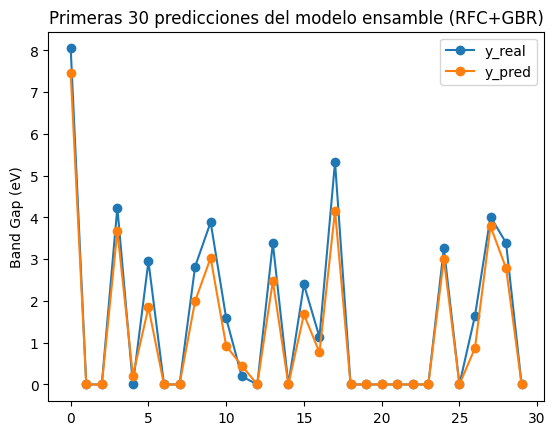

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un gráfico de líneas
plt.plot(df_visualization['y_real'], label='y_real', marker='o')
plt.plot(df_visualization['y_pred'], label='y_pred', marker='o')

# Agregar etiquetas y título
plt.ylabel('Band Gap (eV)')
plt.title('Primeras 30 predicciones del modelo ensamble (RFC+GBR)')
#plt.ylim(0, 7)
# Agregar leyenda
plt.legend()

# Mostrar el recuadro con las etiquetas "y_real" y "y_pred"
plt.legend(loc='upper right', bbox_to_anchor=(1,1))

# Mostrar el gráfico

plt.savefig('predicciones_modelo_final.svg', format='svg', bbox_inches='tight')

plt.show()

In [ ]:
pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 523.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 1.5 MB/s eta 0:00:00


In [ ]:
import cairosvg
# Convert SVG to PDF with adjustable DPI
svg_file = 'predicciones_modelo_final.svg'
pdf_file = 'predicciones_modelo_final.pdf'
dpi = 300  # Adjust DPI as needed

# Convert SVG to PDF with specified DPI
cairosvg.svg2pdf(url=svg_file, write_to=pdf_file, dpi=dpi)

print(f"Archivo PDF '{pdf_file}' creado con éxito.")

Archivo PDF 'predicciones_modelo_final.pdf' creado con éxito.
